# Explorando o Dataset Boston Housing

* Dataset 
    * http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

### Importando os módulos necessários

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

Verificando o tipo da variável boston

In [4]:
type(boston)

sklearn.utils.Bunch

Visualizando o shape do dataset, neste caso 506 instâncias (linhas) e 13 atributos (colunas)

In [5]:
boston.data.shape

(506, 13)

Descrição do Dataset

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Convertendo o dataset em um DataFrame pandas

In [8]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Convertendo o título das colunas

In [9]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


boston.target é uma array com o preço das casas 

In [10]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Adicionando o preço da casa ao DataFrame

In [11]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Ajustando um Modelo

* Iremos ajustar um modelo de regressão para entendermos o comportamento do preço das casas em boston.
* Y - variável dependente (preço das casas em Boston)
* X - variáveis independentes ou covariáveis (todas as outras caracterísricas da casa)

Importando o módulo de regressão linear 

In [13]:
from sklearn.linear_model import LinearRegression

Não queremos o preço da casa como variável dependente

In [12]:
X = df.drop('PRICE', axis = 1)

Definindo Y

In [14]:
Y = df.PRICE

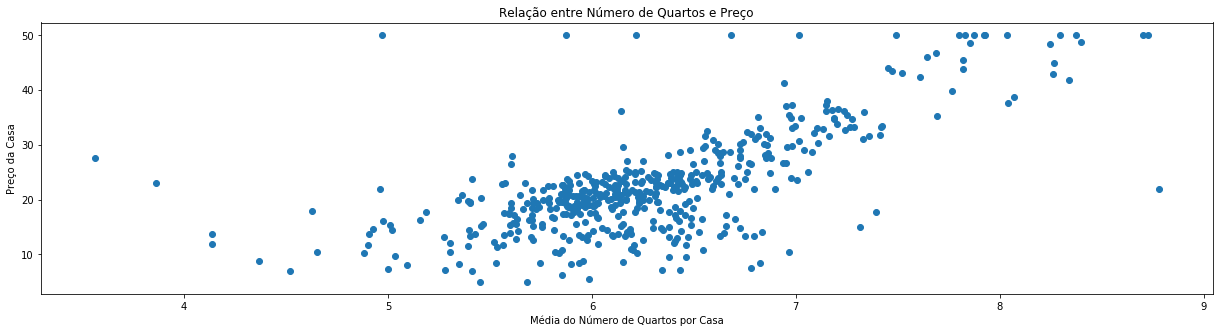

In [16]:
plt.figure(figsize = (21,5))
plt.scatter(df.RM, Y)
plt.xlabel("Média do Número de Quartos por Casa")
plt.ylabel("Preço da Casa")
plt.title("Relação entre Número de Quartos e Preço")
plt.show()

Criando o objeto de regressão linear

In [18]:
regr = LinearRegression()

Tipo do objeto

In [19]:
type(regr)

sklearn.linear_model.base.LinearRegression

Treinando o modelo

In [20]:
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Coeficientes

In [21]:
print("Coeficiente: ", regr.intercept_)

Coeficiente:  36.45948838508969


In [22]:
print("Número de Coeficientes: ", len(regr.coef_))

Número de Coeficientes:  13


Prevendo o preço da casa

In [ ]:
regr.predict(X)

Comparando preços originais x preços previstos

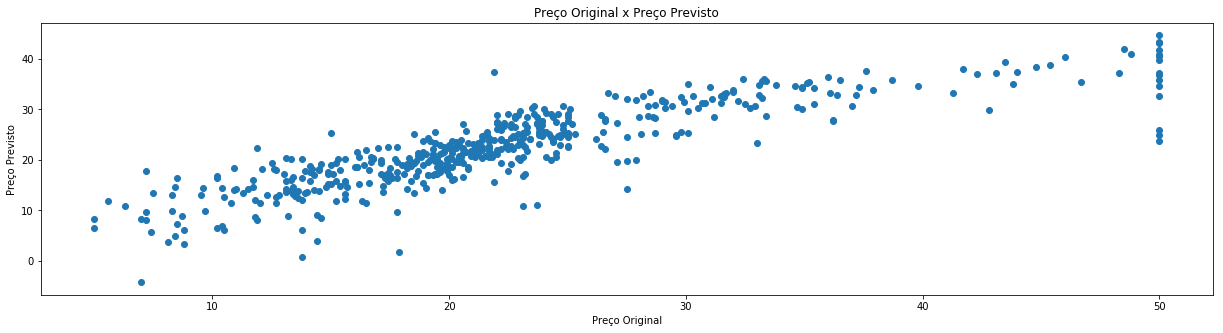

In [24]:
plt.figure(figsize = (21,5))
plt.scatter(df.PRICE, regr.predict(X))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

Como será que está a qualidade do nosso modelo

Vamos calcular o MSE (Mean Squared Error)

In [25]:
mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print(mse1)

21.894831181729185


Aplicando regressão linear para apenas uma variável e calculando o MSE

In [26]:
regr = LinearRegression()
regr.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(X[['PTRATIO']])) ** 2)
print(mse2)

62.65220001376924


Note que considerando apenas a variável __PTRATIO__ o erro quadrático médio (MSE) teve seu valor aumentado, isso indica que para este conjunto de dados considerar apenas a variável __PTRATIO__ como preditora não iremos conseguir explicar o comportamento dos preços das casas de forma eficiente.

### Dados de Treino e Teste 

* Usa-se dividir o conjunto de dados em dados de treino e de teste. 
* Treinamos nosso modelo com os dados de treino 
* E depois usamos o conjunto de dados de teste para verificar a performance do modelo.

No Scikit-Learn podemos dividvir nosso conjunto de dados aleatoriamente usando a função chamada __train_test_split()__.

In [30]:
from sklearn.model_selection import train_test_split

Dividindo X e Y em dados de treino e de teste

In [31]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.33, random_state = 5)

Imprimindo o shape dos datasets

In [32]:
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(339, 13) (167, 13) (339,) (167,)


Construindo um modelo de regressão

In [33]:
regr = LinearRegression()

Treinando o modelo

In [34]:
regr.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
pred_treino = regr.predict(X_treino)

In [36]:
pred_teste = regr.predict(X_teste)

Comparando preços originais x preços previstos

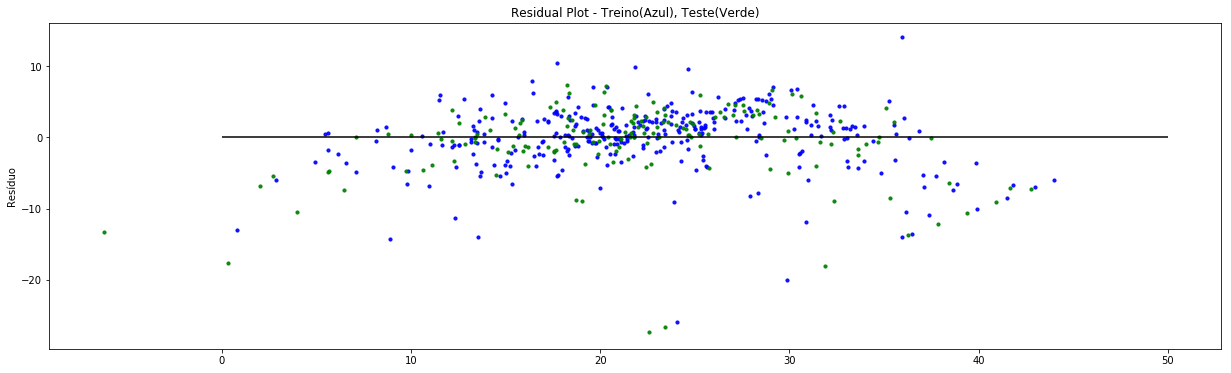

In [50]:
plt.figure(figsize=(21,6))
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 10, alpha = 0.9)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 10, alpha = 0.9)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()